<a href="https://colab.research.google.com/github/OuassimMOU/homework-om/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns




In [ ]:
# Load the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Define the classes that can fly and those that cannot
can_fly = [0, 1]  # Assuming 'airplane' and 'bird' are 0 and 1 in CIFAR10
cannot_fly = [2, 3, 4, 5, 6, 7, 8, 9]  # All other classes

# Create binary labels for the classification task
train_labels_binary = np.where(np.isin(train_labels, can_fly), 1, 0)
test_labels_binary = np.where(np.isin(test_labels, can_fly), 1, 0)

# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy loss
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels_binary, epochs=10,
                    validation_data=(test_images, test_labels_binary))


Epoch 1/10
1563/1563 [==============================] - 118s 74ms/step - loss: 0.3419 - accuracy: 0.8449 - val_loss: 0.2964 - val_accuracy: 0.8733
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.2800 - accuracy: 0.8814 - val_loss: 0.2584 - val_accuracy: 0.8887
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.2411 - accuracy: 0.9009 - val_loss: 0.2718 - val_accuracy: 0.8809
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.2162 - accuracy: 0.9135 - val_loss: 0.2208 - val_accuracy: 0.9078
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.1921 - accuracy: 0.9233 - val_loss: 0.2169 - val_accuracy: 0.9122
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.1716 - accuracy: 0.9310 - val_loss: 0.2328 - val_accuracy: 0.9061
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.1548 - accuracy: 0.9390 - val_loss: 0.2139 

313/313 - 3s - loss: 0.2356 - accuracy: 0.9192 - 3s/epoch - 11ms/step

Test accuracy: 0.9192000031471252
313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8000
           1       0.82      0.77      0.79      2000

    accuracy                           0.92     10000
   macro avg       0.88      0.86      0.87     10000
weighted avg       0.92      0.92      0.92     10000



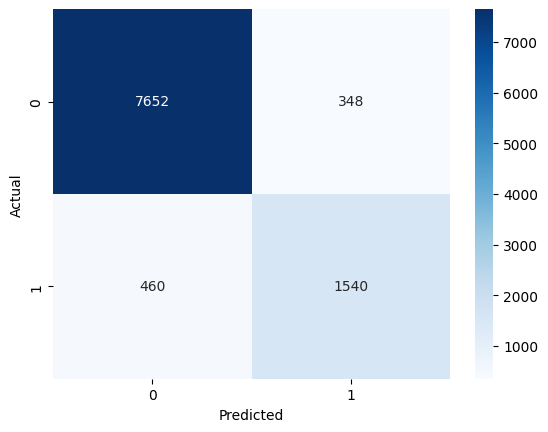

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels_binary, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Predict the labels for the test set
predictions = (model.predict(test_images) > 0.5).astype("int32")

# Classification report
print(classification_report(test_labels_binary, predictions))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels_binary, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

